### Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd 'drive/Othercomputers/My Laptop (1)/MY COLLEGE/ISI KOLKATA/PROJECTS/IIT J Summer Internship 2022/Code/Neural-Uncertainty-Representation/'

### Importing Necessary Packages

In [ ]:
!pip install phate
!pip install scprep

In [4]:
import numpy as np
import phate as ph
import pandas as pd
import scprep as scp
import matplotlib.pyplot as plt

## Loading the Data o Young Subjects

I have already prepared the BOLD Data of the following ROIs for young subjects in 3D-Tensor of dimenension (TR, Voxel, Number of Subjects):
- lOFC
- mOFC
- mPFC
- dmPFC
- vlPFC

In [5]:
data_lOFC = np.load('YOUNG/data_lOFC.npy')
data_mOFC = np.load('YOUNG/data_mOFC.npy')
data_mPFC = np.load('YOUNG/data_mPFC.npy')
data_dmPFC = np.load('YOUNG/data_dmPFC.npy')
data_vlPFC = np.load('YOUNG/data_vlPFC.npy')

We now find the BOLD data for all voxel and all the TRs averaged over the subjects.

In [6]:
data_lOFC_avg = np.mean(data_lOFC, axis=2)
data_mOFC_avg = np.mean(data_mOFC, axis=2)
data_mPFC_avg = np.mean(data_mPFC, axis=2)
data_dmPFC_avg = np.mean(data_dmPFC, axis=2)
data_vlPFC_avg = np.mean(data_vlPFC, axis=2)

In [7]:
data_lOFC_avg.shape

(189, 1700)

### PHATE Representation

Here we apply the PHATE Algorithm on the average BOLD data corresponding to each ROI. After some initial confusion on the PHATE diagram should apply dimension reduction on the Voxels or on TRs, I finally came to the conclusion of applying the PHATE algorithm to decrease the Voxel dimensionality. Since, the T-PHATE paper color coded their representation based on TRs.

In [8]:
def plot_phate_rep(data, c, ax=None, title="", legend_title=""):
  # We now instantiate the PHATE operator(matrix)/object of the PHATE class
  phate_op = ph.PHATE(random_state=43, verbose=0)
  # PHATE requires Voxel x TR Data
  phate_embd =  phate_op.fit_transform(data)
  scp.plot.scatter2d(phate_embd, ax=ax,  c = c, label_prefix='PHATE ', title=title, legend_title=legend_title)

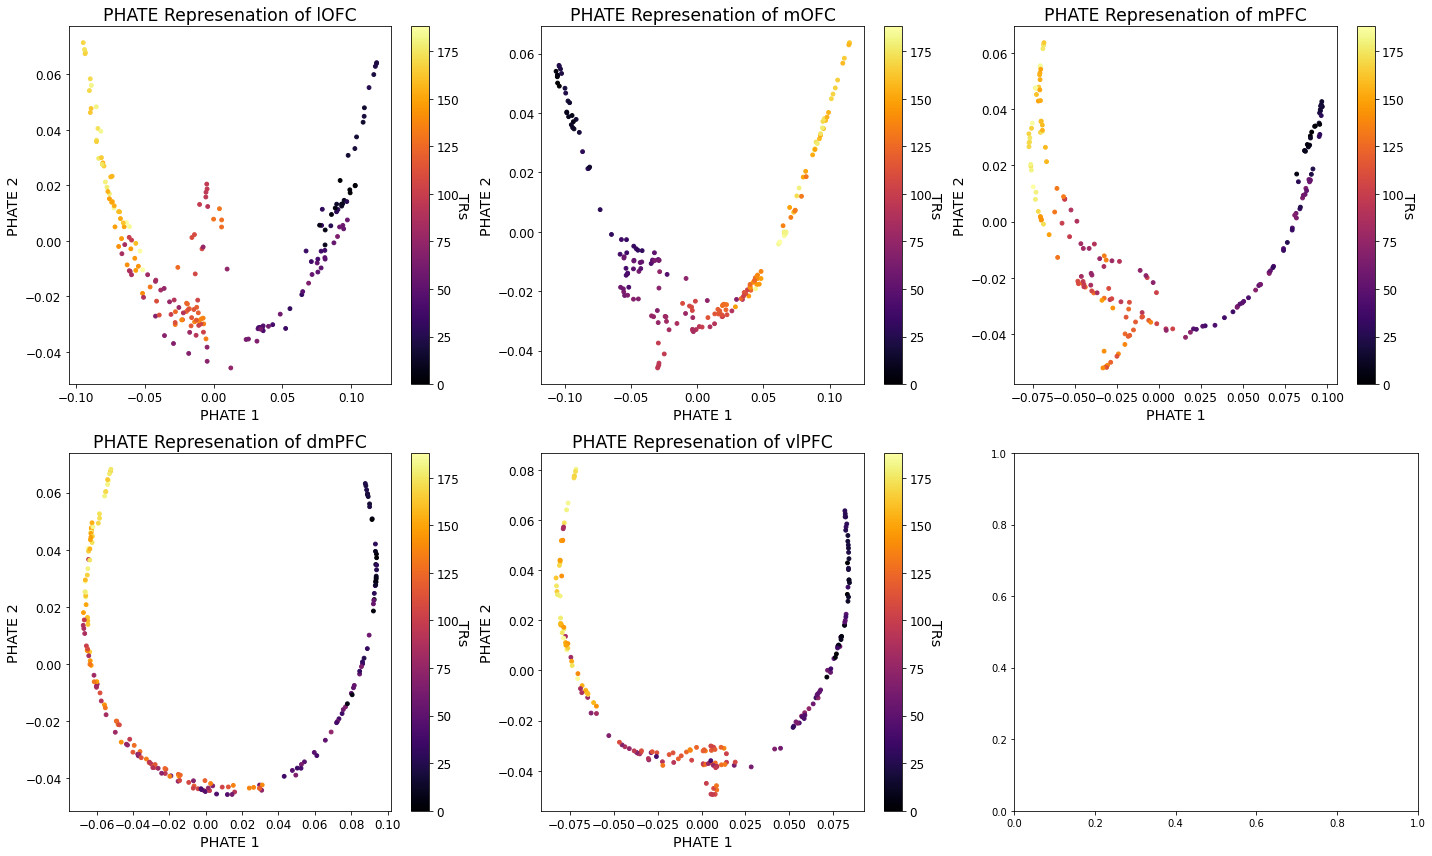

In [9]:
ROIs_data = [data_lOFC_avg, data_mOFC_avg, data_mPFC_avg, data_dmPFC_avg, data_vlPFC_avg]
ROIs = ["lOFC", "mOFC", "mPFC", "dmPFC", "vlPFC"]

fig, ax = plt.subplots(2,3, figsize=(20,12))
i = 0
for name, data in zip(ROIs, ROIs_data):
  plot_phate_rep(data, list(range(data.shape[0])), ax[min(max(0, i-2),1),i%3], "PHATE Represenation of "+ name, "TRs")
  i += 1
  fig.tight_layout()

I have color coded each set of Ascent and Descent below, i.e.
- 0 indicates those TRs which are neither ascent and descent. 
- 1 indicates those TRs which are in A1 and D1.
- 2 indicates those TRs which are in A2 and D2.
- 3 indicates those TRs which are in A3 and D3.
- 4 indicates those TRs which are in A4 and A4
- 5 indicates those TRs wiich are in A5 and D5.

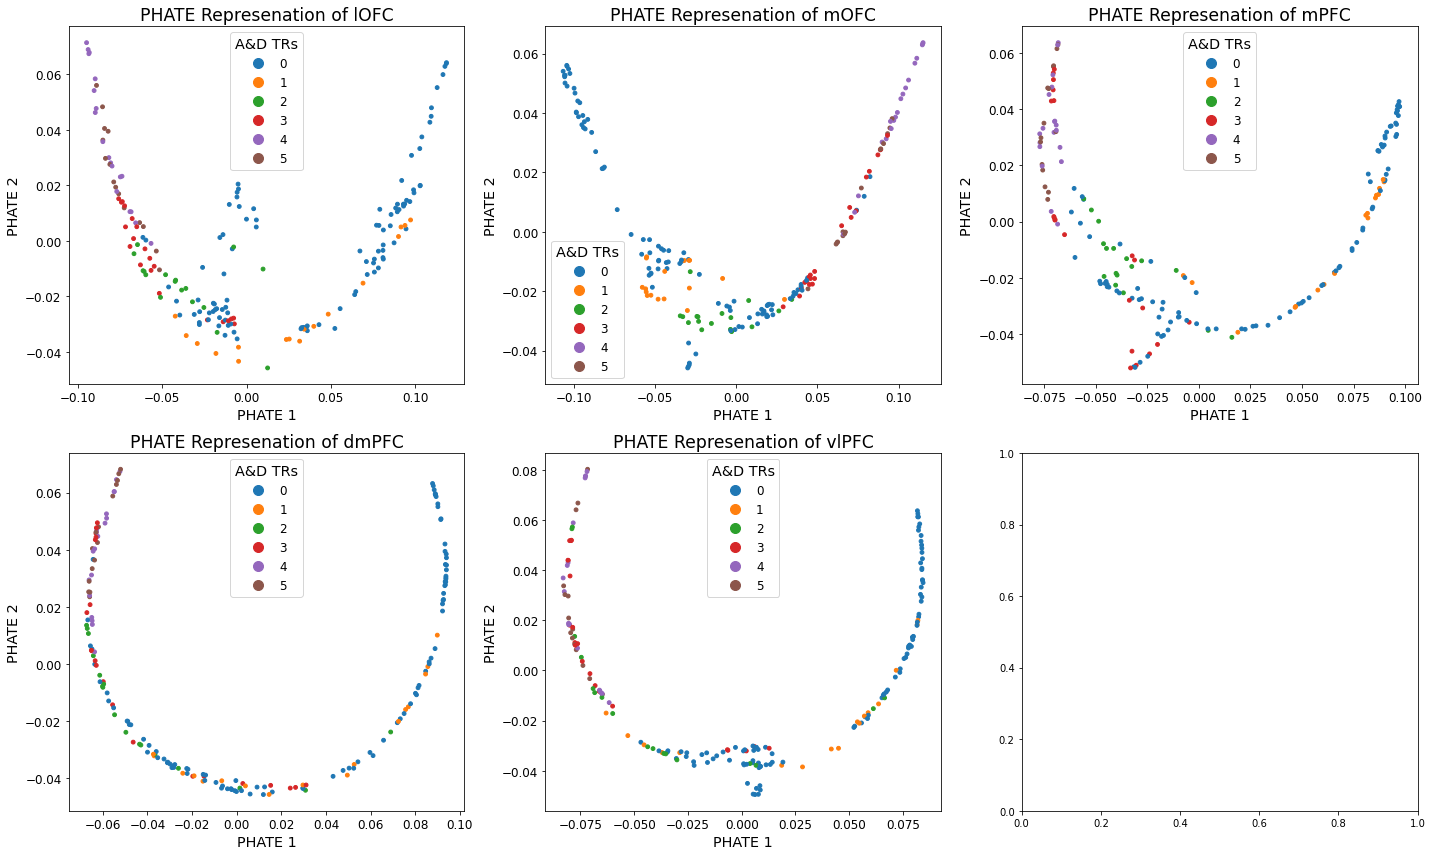

In [10]:
fig, ax = plt.subplots(2,3, figsize=(20,12))
i = 0
for name, data in zip(ROIs, ROIs_data):
  plot_phate_rep(data, [0]*56+[1]*17+[2]*17+[0]*44+[3]*21+[4]*19+[5]*15, ax[min(max(0, i-2),1),i%3], "PHATE Represenation of "+ name, "A&D TRs")
  i += 1
  fig.tight_layout()